/tmp/ipykernel_21644/86710685.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:1.0f}M'.format(x*1e-6) for x in current_yvalues])


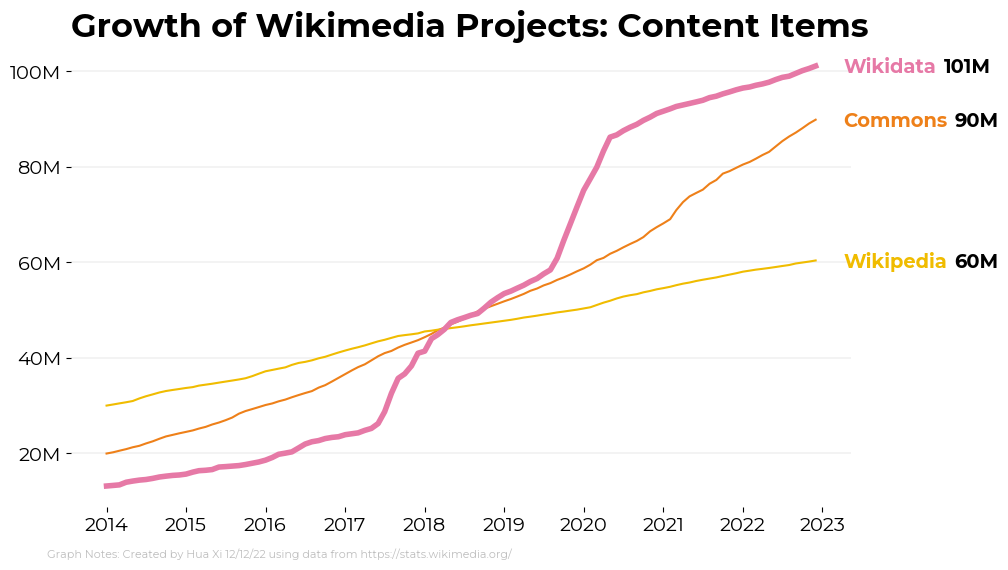

In [1]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager
import os
import numpy as np

#---PROMPT FOR INPUT---
outfile_name = "Project_Growth_Chart.png"
yoy_note = " "

#---READ IN DATA---
#get current path
home_dir = os.getcwd()

df_wikidata = pd.read_csv(home_dir + '/data/wikidata_growth.csv')
df_wikipedia = pd.read_csv(home_dir + '/data/wikipedia_growth.csv')
df_commons = pd.read_csv(home_dir + '/data/commons_growth.csv')

#display top rows for preview
#df.iloc[0,:] 

#---CLEAN DATA--
#print out data types
#print(df.month.dtype)

#convert string to datetime
df_wikidata['month'] = df_wikidata['month'].apply(lambda x: x.rsplit("T")[0])
df_wikipedia['month'] = df_wikipedia['month'].apply(lambda x: x.rsplit("T")[0])
df_commons['month'] = df_commons['month'].apply(lambda x: x.rsplit("T")[0])
df_wikidata['month'] = pd.to_datetime(df_wikidata['month'])
df_wikipedia['month'] = pd.to_datetime(df_wikipedia['month'])
df_commons['month'] = pd.to_datetime(df_commons['month'])

#change column names
df_wikidata = df_wikidata.rename(columns={'total.content':'wikidata'})
df_wikipedia = df_wikipedia.rename(columns={'total.content':'wikipedia'})
df_commons = df_commons.rename(columns={'total.content':'commons'})

#drop unneeded columns
df_wikidata = df_wikidata.drop(columns=['timeRange.start', 'timeRange.end'])
df_wikipedia = df_wikipedia.drop(columns=['timeRange.start', 'timeRange.end'])
df_commons = df_commons.drop(columns=['timeRange.start', 'timeRange.end'])

#merge into one dataframe
df = pd.merge(pd.merge(df_wikidata,df_wikipedia,on='month'),df_commons,on='month')

#truncate date
df = df[df["month"].isin(pd.date_range("2014-01-01", "2022-12-01"))]

#---PREPARE TO PLOT ---
#adjust plot size
plt.rcParams["figure.figsize"] = [12, 6]

#create a dictionary for colors
wmf_colors = {'black75':'#404040','black50':'#7F7F7F','black25':'#BFBFBF','base80':'#eaecf0','base70':'#c8ccd1','purple':'#5748B5','orange':'#EE8019','red':'#970302','pink':'#E679A6','purple':'#5748B5','blue':'#0E65C0','brightblue':'#049DFF','brightbluelight':'#C0E6FF','yellow':'#F0BC00','green':'#308557','brightgreen':'#71D1B3'}

#add Montserrat file by file (quick fix)
#font_montserrat = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Regular.ttf")
#font_montserrat_bold = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Bold.ttf")

font_dirs = [home_dir + "/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#check added fonts
#result = custom_font_manager.get_font_names()
#print(result)

#add grid lines
#thin light black line
plt.grid(axis = 'y', color = wmf_colors['black25'], linewidth = 0.25)
#dashed light black line
#plt.grid(axis = 'y', color = wmf_colors['black25'], linestyle = '--', linewidth = 0.5)

#---PLOT---
#plot data
plt.plot(df.month, df.wikidata,
	label='_nolegend_',
	color=wmf_colors['pink'],
	linewidth = 4,
	zorder=6)
plt.plot(df.month, df.wikipedia,
	label='_nolegend_',
	color=wmf_colors['yellow'],
	zorder=5)
plt.plot(df.month, df.commons,
	label='_nolegend_',
	color=wmf_colors['orange'],
	zorder=4)

#---FORMATTING---
#add title and axis labels
plt.title('Growth of Wikimedia Projects: Content Items',font='Montserrat',weight='bold',fontsize=24,loc='left')
#plt.xlabel("Month",font='Montserrat', fontsize=18, labelpad=10) #source serif pro
#plt.ylabel("Items",font='Montserrat', fontsize=18)

#format axis labels
current_yvalues = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}M'.format(x*1e-6) for x in current_yvalues])
plt.xticks(fontsize=14,fontname = 'Montserrat')
plt.yticks(fontsize=14,fontname = 'Montserrat')

#expand bottom margin
plt.subplots_adjust(bottom=0.11, left=0.1, right=0.75)

#remove bounding box
for pos in ['right', 'top', 'bottom', 'left']:
	plt.gca().spines[pos].set_visible(False)

#---ADD ANNOTATIONS---
#YoY Change Annotation
#calculate YoY change
def annotate(data_label, legend_label, label_color, x_distance):
	plt.annotate(legend_label,
		xy = (df['month'].iat[-1],df[data_label].iat[-1]),
		xytext = (20,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color=label_color,
		fontsize=14,
		weight='bold',
		family='Montserrat')
	final_count = df[data_label].iat[-1]
	count_annotation = '{:1.0f}M'.format(final_count*1e-6) 
	plt.annotate(count_annotation,
		xy = (df['month'].iat[-1],final_count),
		xytext = (x_distance,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color='black',
		fontsize=14,
		weight='bold',
		wrap=True,
		family='Montserrat')
annotate('wikidata', 'Wikidata',wmf_colors['pink'], 92)
annotate('wikipedia', 'Wikipedia',wmf_colors['yellow'], 100)
annotate('commons', 'Commons',wmf_colors['orange'], 100)

#data notes
plt.figtext(0.08, 0.025, "Graph Notes: Created by Hua Xi 12/12/22 using data from https://stats.wikimedia.org/", fontsize=8, family='Montserrat', color= wmf_colors['black25'])

#---SHOW GRAPH---
#save as image
save_file_name = home_dir + "/charts/" + outfile_name
plt.savefig(save_file_name, dpi=300)
#show in window
plt.show()